# CS-E-106: Data Modeling
## Fall 2019: HW 02

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

**Solution 2:**

**(a)**

In [3]:
gpa = pd.read_csv("data/GPA.csv")
lm_gpa = ols("GPA ~ ACT ", data=gpa).fit()
lm_gpa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.240
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00292
Time:                        18:31:26   Log-Likelihood:                -112.50
No. Observations:                 120   AIC:                             229.0
Df Residuals:                     118   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1140      0.321      6.588      0.000       1.479       2.750
ACT            0.0388      0.013      3.040      0.003       0.014       0.064
==============================================================================
Omnibus:                       26.969   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.360
Skew:                          -0.994   Prob(JB):                     5.20e-11
Kurtosis:                       5.349   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b)**

In [4]:
lm_gpa.conf_int(alpha=0.01)

,0,1
Intercept,1.273903,2.954196
ACT,0.005386,0.072269


We can see that the confidence interval of $\beta_{1}$ does not contain 0. Therefore, there is 99% chance that the $\beta_{1}$ is not actually 0.

**(c)**

$t = \frac{b_1}{s(b_1)}$

In [5]:
t = 0.03883/0.013
print(t)
pr_t = stats.t.sf(t, 118)
print(pr_t)

2.9869230769230772
0.0017140169212107


Based on the t-test, the probability that $beta_{1}$ is greater than 0 is 0.001454. This means that there exists a linear relationship between GPA and ACT.


**Solution 3:**

**(a)**

In [6]:
Xh = pd.DataFrame([28], columns=["ACT"])
Xh

,ACT
0,28


In [7]:
predictions = lm_gpa.get_prediction(Xh)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.201209,0.070609,3.061384,3.341033,1.959355,4.443063


*Interpretation:*

- This means that we can predict with 95% confidence that $\beta_{1}$ is within the range: (3.061384, 3.341033)
- Narrower C.I. means that we are more confident about our fit for $X_{h} = 28$
- Also, since we are using the entire data set for development of our model, it might give us a better fit on the observation that is within the sample.

**(b)**

Same two cells of code as for (a), just look at obs values.

*Interpretation:*

- This means that we can predict with 95% confidence that $\beta_{1}$ is within the range: (1.959355, 4.443063)
- This range is considerably larger than that in part a, as we are now calculating the C.I. for an out of sample observation.

**(c)**

Yes, the prediction interval in part (b) is wider than the confidence interval in part (a). This makes sense and is expected, since an observation outside the development model will have wider distribution and more variation.

**(d)**

We will use the formula for Working-Hotelling $1-\alpha$ confidence band for a regression line: 

$\hat{Y_{h}} +_{-} W*s(\hat{Y_{h}})$

where,
$W = 2F(1-\alpha; 2, n-2)$

In [8]:
Xh = pd.DataFrame([28], columns=["ACT"])
W = np.sqrt( 2 * stats.f.ppf(0.95,2,118))
predictions = lm_gpa.get_prediction(Xh)
CI = predictions.summary_frame(alpha=0.05)
print(CI)
CI["mean"]-W*CI["mean_se"], CI["mean"]+W*CI["mean_se"]

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  3.201209  0.070609       3.061384       3.341033      1.959355   

   obs_ci_upper  
0      4.443063  


(0    3.026159
 dtype: float64, 0    3.376258
 dtype: float64)

We see that the band on the regression line at $X_{h}=28$ is wider than that in part (a). This is expected, because in part (a) we use t multiple to calculate the confidence interval, whereas, in part (d) we use W multiple. And W multiple is larger than t since it encompasses the entire regression line whereas C.I. for $E[\hat{Y_{h}}]$ at $X_{h}=28$ applies only to that particular observation.


**Solution 4:**

In [9]:
train_gpa, test_gpa = train_test_split(gpa, test_size=0.3, random_state=1234)

In [10]:
test_gpa.shape, train_gpa.shape

((36, 2), (84, 2))

In [11]:
lm_gpa_tr = ols("GPA ~ ACT ", data=train_gpa).fit()
lm_gpa_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     11.11
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00129
Time:                        18:31:28   Log-Likelihood:                -68.541
No. Observations:                  84   AIC:                             141.1
Df Residuals:                      82   BIC:                             145.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9196      0.366      5.238      0.000       1.191       2.649
ACT            0.0486      0.015      3.333      0.001       0.020       0.078
==============================================================================
Omnibus:                        1.870   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.854
Skew:                          -0.296   Prob(JB):                        0.396
Kurtosis:                       2.577   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(a)**

In [12]:
Xh = pd.DataFrame([28], columns=["ACT"])
predictions = lm_gpa_tr.get_prediction(Xh)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.279462,0.076236,3.127804,3.43112,2.16736,4.391564


*Interpretation:*

- This means that we can predict with 95% confidence that $\beta_{1}$ is within the range: (3.127804, 3.43112)
- Now that we are using the only the training data set for development of our model, we get slightly higher variation in our prediction than in Q.3(a).

**(b)**

Same two cells of code as for (a), just look at obs values.

*Interpretation:*

- This means that we can predict with 95% confidence that $\beta_{1}$ is within the range: (2.16736, 4.391564)
- Now that we are using the only the training data set for development of our model, we get slightly higher variation in our prediction than in Q.3(b).

**(c)**

Yes, the prediction interval in part (b) is wider than the confidence interval in part (a). This makes sense and is expected, since an observation outside the development model will have wider distribution and more variation.

**(d)**

In [13]:
Xh = pd.DataFrame([28], columns=["ACT"])
W = np.sqrt( 2 * stats.f.ppf(0.95,2,82))
predictions = lm_gpa_tr.get_prediction(Xh)
CI = predictions.summary_frame(alpha=0.05)
print(CI)
CI["mean"]-W*CI["mean_se"], CI["mean"]+W*CI["mean_se"]

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  3.279462  0.076236       3.127804        3.43112       2.16736   

   obs_ci_upper  
0      4.391564  


(0    3.089394
 dtype: float64, 0    3.46953
 dtype: float64)

We see that the band on the regression line at $X_{h}=28$ is wider than that in part (a). This is expected, because in part (a) we use t multiple to calculate the confidence interval, whereas, in part (d) we use W multiple. And W multiple is larger than t since it encompasses the entire regression line whereas C.I. for $E[\hat{Y_{h}}]$ at $X_{h}=28$ applies only to that particular observation.

Again, the band is wider than Q.3(d) since we are only using training set for development of our model.

*Calculating MSE for the hold-out set:*

In [14]:
Yhat = lm_gpa_tr.predict(test_gpa)
resids = test_gpa.GPA-Yhat
SSE = np.sum(resids**2)
df_resids = test_gpa.shape[0]-2
MSE_te = SSE/df_resids
print(MSE_te)

0.6220889282448168


**Solution 5:**

**(a)**

$\epsilon_{i} ~ N(0,25)$

$\implies \sigma = \sqrt{25} = 5$

In [15]:
def get_xy_data():
    X = np.array([4,8,12,16,20])
    ei = np.random.normal(loc=0, scale=5, size=5)
    Y = (20+4*X+ei)
    xy_data = pd.DataFrame(np.vstack([X,Y]).T, columns=["X","Y"])
    return(xy_data)

np.random.seed(1234)
xy_data = get_xy_data()
xy_data

,X,Y
0,4.0,38.357176
1,8.0,46.045122
2,12.0,75.163535
3,16.0,82.436741
4,20.0,96.397056


In [16]:
lm_xy = ols("Y ~ X ", data=xy_data).fit()
lm_xy.summary()

/home/srk-apts/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     68.66
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00368
Time:                        18:31:31   Log-Likelihood:                -14.623
No. Observations:                   5   AIC:                             33.25
Df Residuals:                       3   BIC:                             32.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9385      6.103      3.595      0.037       2.516      41.361
X              3.8118      0.460      8.286      0.004       2.348       5.276
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.099
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.188
Skew:                           0.337   Prob(JB):                        0.910
Kurtosis:                       2.332   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
Xh = pd.DataFrame([10], columns=["X"])
predictions = lm_xy.get_prediction(Xh)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,60.056357,2.760133,51.27238,68.840333,39.560412,80.552302


**(b)**

In [18]:
def get_results():
    for i in range(200):
        data = get_xy_data()
        lm = ols("Y ~ X ", data=data).fit()
        Xh = pd.DataFrame([10], columns=["X"])
        predictions = lm.get_prediction(Xh)
        CI = predictions.summary_frame(alpha=0.05)
        b1 = pd.DataFrame([lm.params[1]], columns=["b1"])
        EY = pd.DataFrame([np.mean(lm.predict(data))], columns=["EY"])

        if(i==0):
            df_results = pd.concat([CI,b1,EY], axis=1)
        else:
            results_curr = pd.concat([CI,b1,EY], axis=1)
            df_results = pd.concat([df_results, results_curr], axis=0)
            
    return(df_results)

In [19]:
df_results = get_results()
df_results

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,b1,EY
0,60.659136,1.767131,55.035337,66.282936,47.536937,73.781335,3.112052,66.883239
0,62.235330,2.642863,53.824562,70.646099,42.610204,81.860457,3.252322,68.739974
0,61.016502,2.692257,52.448539,69.584466,41.024587,81.008417,3.727207,68.470916
0,60.143645,0.923048,57.206094,63.081196,53.289360,66.997930,4.531376,69.206396
0,58.715611,2.918281,49.428337,68.002884,37.045305,80.385916,4.274736,67.265082
0,62.088928,0.955473,59.048185,65.129670,54.993861,69.183994,4.403952,70.896832
0,61.476695,1.713000,56.025164,66.928227,48.756455,74.196935,4.717883,70.912462
0,58.010047,2.568407,49.836231,66.183863,38.937809,77.082285,3.854332,65.718710
0,59.175755,0.937668,56.191678,62.159833,52.212908,66.138602,4.389632,67.955020
0,57.702467,2.546182,49.599379,65.805556,38.795261,76.609674,3.820799,65.344065


**(c)**

(array([ 4.,  6., 28., 29., 37., 38., 31., 19.,  7.,  1.]),
 array([2.9707936 , 3.17588025, 3.3809669 , 3.58605355, 3.79114019,
        3.99622684, 4.20131349, 4.40640014, 4.61148678, 4.81657343,
        5.02166008]),
 <a list of 10 Patch objects>)

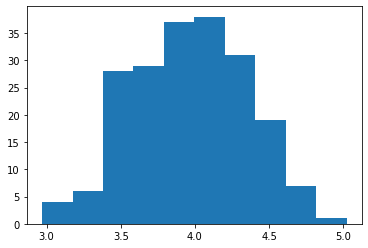

In [20]:
plt.hist(df_results.b1)

In [21]:
np.mean(df_results.b1)

3.9645134633159556

In [22]:
np.std(df_results.b1)

0.3805074328950835

**(d)**

In [38]:
lwr = (df_results["mean_ci_lower"]<=df_results["EY"])
upr = (df_results["mean_ci_upper"]>=df_results["EY"])

df_results["inc_EY"] = 0
df_results.loc[lwr & upr, "inc_EY"] = 1

In [40]:
np.sum(df_results["inc_EY"])/200

0.365

In [42]:
mu = np.mean(xy_data["X"])
sigma = 5
Z = (10-mu)/5
print(Z)

stats.norm.sf(abs(Z))

-0.4


0.3445782583896758